In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data['Amount'].values.reshape(-1,1)
np.reshape

<function numpy.core.fromnumeric.reshape>

In [5]:
count_classes=pd.value_counts(data['Class'],sort=True).sort_index()

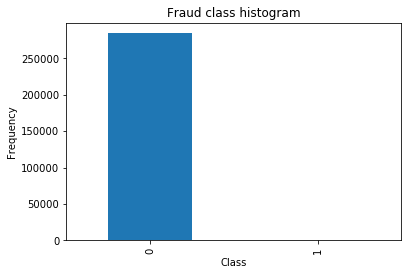

In [6]:
count_classes.plot(kind='bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel('Frequency')

In [7]:

from sklearn.preprocessing import StandardScaler
data['normAmount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data=data.drop(['Time','Amount'],axis=1)

In [8]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
# print(data.columns != 'Class')
# print(data.columns)
X=data.loc[:,data.columns!='Class']
y=data.loc[:,data.columns=='Class']

In [10]:
number_records_fraud=len(data[data.Class==1])
print(number_records_fraud)

492


In [11]:
fraud_indices=np.array(data[data.Class==1].index)
fraud_indices.shape

(492,)

In [12]:
normal_indices=data[data.Class==0].index
print(normal_indices.shape)
print(type(normal_indices))

(284315,)
<class 'pandas.core.indexes.numeric.Int64Index'>


In [13]:

random_normal_indices=np.random.choice(
    normal_indices,number_records_fraud,replace=False)
print(type(random_normal_indices) )
print(random_normal_indices.shape)


<class 'numpy.ndarray'>
(492,)


In [14]:
random_normal_indices=np.array(random_normal_indices)
print(type(random_normal_indices))
print(random_normal_indices.shape)

<class 'numpy.ndarray'>
(492,)


In [15]:
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])

In [16]:
print('1'*100)
print(type(under_sample_indices))
print(under_sample_indices.shape)
print(under_sample_indices[:5])


1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
<class 'numpy.ndarray'>
(984,)
[ 541  623 4920 6108 6329]


In [17]:
under_sample_data=data.iloc[under_sample_indices,:]
X_undersample=under_sample_data.loc[:,under_sample_data.columns!='Class'] 
y_undersample=under_sample_data.loc[:,under_sample_data.columns=='Class']
print(under_sample_data.values.shape)
print(X_undersample.values.shape)
print(y_undersample.values.shape)

(984, 30)
(984, 29)
(984, 1)


In [18]:
print('Percentage of normal transaction:',len(under_sample_data[under_sample_data.Class==0])/len(under_sample_data))
print('Percentage of fraud transactions:',len(under_sample_data[under_sample_data.Class==1])/len(under_sample_data))
print('Total number of transactions in resampled data:',len(under_sample_data))

Percentage of normal transaction: 0.5
Percentage of fraud transactions: 0.5
Total number of transactions in resampled data: 984


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(199364, 29)
(85443, 29)
(199364, 1)
(85443, 1)


In [21]:
X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample=train_test_split(
    X_undersample,
    y_undersample,
    test_size=0.3,
    random_state=0
)

In [22]:
print(X_train_undersample.shape)
print(X_test_undersample.shape)
print(y_train_undersample.shape)
print(y_test_undersample.shape)

(688, 29)
(296, 29)
(688, 1)
(296, 1)


In [23]:
print('Number transactions train dataset:',len(X_train))
print('Number transactions test dataset:',len(X_test))
print('Total number of transactions:',len(X_train)+len(X_test ))
print("")

Number transactions train dataset: 199364
Number transactions test dataset: 85443
Total number of transactions: 284807



In [24]:

print('Number transactions train dataset: ',len(X_train_undersample))
print('Number transactions test dataset: ',len(X_test_undersample))
print('Total number of transactions',len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions 984


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [26]:

def printing_Kfold_scores(x_train_data,y_train_data):
    fold=KFold(5,shuffle=False)
    print('2'*100)
    print(type(fold))
    # Different C parameters 
    c_param_range=[0.01,0.1,1,10,100]
    results_table=pd.DataFrame(index=range(len(c_param_range),2),columns=['C_parameter','Mean recall score'])
    print(results_table.info())
    print(results_table.shape)
    results_table['C_parameter']=c_param_range
    print(results_table.info())
    # the k-fold will give 2 lists train_indices=indices[0],test_indices=indices[1]
    j=0
    for c_param in c_param_range:
        print('-'*50)
        print('C parameter:',c_param)
        print('-'*50)
        print('')
        recall_accs=[]
        print(x_train_data.shape)
        print(fold.split(x_train_data))
        for iteration,indices in enumerate(fold.split(x_train_data)):
            print(type(iteration))
            print(len(indices))
        #     call the logistic regression model with a certain C parameter 
            lr=LogisticRegression(C=c_param,penalty='l1',solver='liblinear')
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            y_pred_undersample=lr.predict(x_train_data.iloc[indices[1],:].values)
            recall_acc=recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration  ',iteration,': recall score =',recall_acc)
        print('recall_accs{}'.format(recall_acc))
        results_table.loc[j:'Mean recall score ']=np.mean(recall_accs)
        j+=1
        print('')
        print('Mean recall score' ,np.mean(recall_accs))
        print('')
    print('3'*100)
    print(results_table)
    best_c=results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    print('*'*100)
    print('Best model to choose from cross validation is with C parameter =',best_c)
    print('*'*100)
    return best_c

In [27]:
best_c=printing_Kfold_scores(X_train_undersample,y_train_undersample)

2222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222
<class 'sklearn.model_selection._split.KFold'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
C_parameter          0 non-null object
Mean recall score    0 non-null object
dtypes: object(2)
memory usage: 84.0+ bytes
None
(0, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
C_parameter          5 non-null float64
Mean recall score    0 non-null object
dtypes: float64(1), object(1)
memory usage: 160.0+ bytes
None
--------------------------------------------------
C parameter: 0.01
--------------------------------------------------

(688, 29)
<generator object _BaseKFold.split at 0x7fde55060a40>
<class 'int'>
2
Iteration   0 : recall score = 0.958904109589041
<class 'int'>
2
Iteration   1 : recall score = 0.9178082191780822
<class 'int'>
2
Iteration   2 : recall score = 1.0
<class 'int'>
2
It

In [28]:
import itertools
def plot_confusion_matrix(cm,classes,title='Confusion matrix',cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix
    '''
    plt.imshow(cm,interpolation='nearest',cmap=cmap) 
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=0)
    plt.yticks(tick_marks,classes)
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center'
                )
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metrix in the testing dataset:  0.9251700680272109


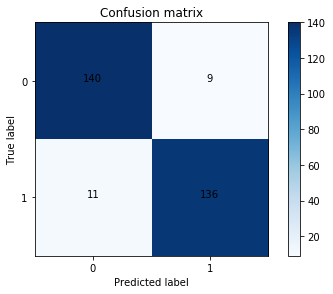

In [42]:
lr=LogisticRegression(C=best_c,penalty='l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample=lr.predict(X_test_undersample.values)
# print(y_pred_undersample)
# print(y_test_undersample) 
cnf_matrix=confusion_matrix(y_test_undersample,y_pred_undersample)
# print(cnf_matrix)
np.set_printoptions(precision=2)
print('Recall metrix in the testing dataset: ',cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix ,
                      classes=class_names,
                      title='Confusion matrix' )
plt.show()


Recall metrix in the testing dataset: 0.9251700680272109


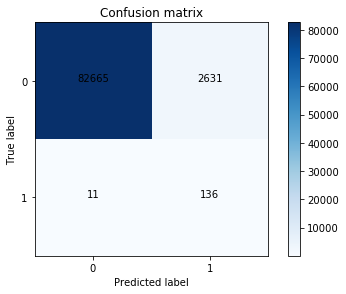

In [43]:
lr=LogisticRegression(C=best_c,penalty='l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred=lr.predict(X_test.values)
cnf_matrix=confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
print("Recall metrix in the testing dataset:",cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,
                     classes=class_names,
                     title='Confusion matrix')
plt.show()


In [44]:
best_c=printing_Kfold_scores(X_train,y_train)


2222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222
<class 'sklearn.model_selection._split.KFold'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
C_parameter          0 non-null object
Mean recall score    0 non-null object
dtypes: object(2)
memory usage: 84.0+ bytes
None
(0, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
C_parameter          5 non-null float64
Mean recall score    0 non-null object
dtypes: float64(1), object(1)
memory usage: 160.0+ bytes
None
--------------------------------------------------
C parameter: 0.01
--------------------------------------------------

(199364, 29)
<generator object _BaseKFold.split at 0x7fde3fd7ea40>
<class 'int'>
2
Iteration   0 : recall score = 0.4925373134328358
<class 'int'>
2
Iteration   1 : recall score = 0.6027397260273972
<class 'int'>
2
Iteration   2 : recall score = 0.6833333333333333

Recall metrix in the testing dataset : 0.6190476190476191


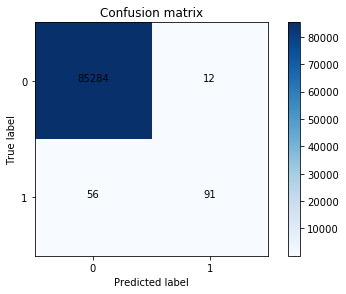

In [45]:
lr=LogisticRegression(C=best_c,penalty='l1',solver='liblinear')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample=lr.predict(X_test.values)
# Compute confusion matrix 
cnf_matrix=confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)
print('Recall metrix in the testing dataset :',cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
# Plot non_normalized confusion matrix 
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      ,classes=class_names
                      ,title='Confusion matrix')
plt.show()

/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in long_scalars
  


Recall metric in the testing dataset : inf
Recall metric in the testing dataset : inf
Recall metric in the testing dataset : inf
Recall metric in the testing dataset : 217.5
Recall metric in the testing dataset : 150.7
Recall metric in the testing dataset : 137.64705882352942
Recall metric in the testing dataset : 126.88
Recall metric in the testing dataset : 112.97297297297297
Recall metric in the testing dataset : 88.45


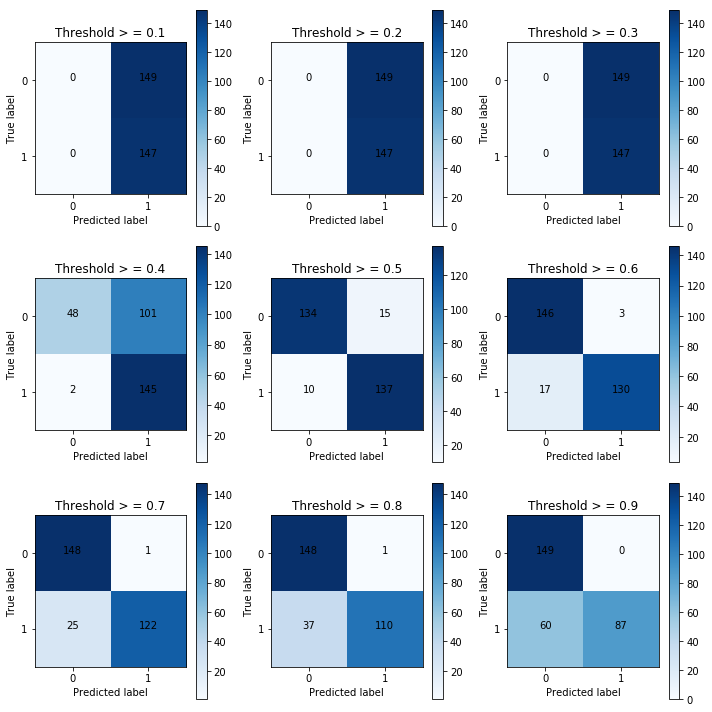

In [46]:
lr=LogisticRegression(C=0.01,penalty='l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba=lr.predict_proba(X_test_undersample.values)
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.figure(figsize=(10,10))
j=1
for i in thresholds:
    y_test_predictions_high_recall=y_pred_undersample_proba[:,1]>i
    plt.subplot(3,3,j)
    j+=1
    #compute confusion matrix 
    cnf_matrix=confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    print("Recall metric in the testing dataset :",cnf_matrix[1,1]/cnf_matrix[1,0]+cnf_matrix[1,1])
    # Plot non-normalized confusion matrix 
    class_names=[0,1]
    plot_confusion_matrix(cnf_matrix
                          ,classes=class_names
                          ,title='Threshold > = %s'%i)
    
    




In [47]:
y_pred_undersample_proba[:,1]

array([0.46, 0.43, 1.  , 0.41, 0.45, 0.99, 0.82, 0.41, 0.39, 0.39, 0.6 ,
       0.41, 1.  , 0.99, 0.49, 0.98, 0.37, 0.41, 0.96, 1.  , 0.6 , 0.43,
       1.  , 0.35, 0.98, 0.51, 0.95, 0.78, 0.38, 0.54, 0.7 , 0.37, 0.39,
       0.44, 0.97, 0.95, 1.  , 0.45, 0.89, 0.96, 1.  , 0.39, 0.42, 1.  ,
       0.37, 0.41, 0.92, 0.9 , 0.97, 0.47, 0.59, 0.7 , 0.35, 0.45, 0.88,
       0.97, 0.37, 0.47, 0.77, 0.97, 0.96, 0.42, 0.92, 0.36, 0.34, 0.41,
       0.97, 0.54, 0.45, 0.39, 0.4 , 0.39, 0.46, 0.47, 0.43, 1.  , 0.43,
       0.86, 0.96, 0.39, 0.87, 0.44, 0.74, 0.91, 0.35, 0.36, 0.98, 0.45,
       0.99, 0.43, 0.45, 0.33, 0.35, 0.36, 0.98, 0.38, 0.96, 0.37, 0.88,
       0.41, 0.96, 0.64, 0.5 , 0.42, 0.86, 0.36, 0.81, 1.  , 0.48, 0.88,
       0.41, 0.99, 0.99, 0.78, 0.49, 0.46, 0.92, 0.38, 0.41, 0.99, 0.98,
       0.38, 0.39, 0.97, 0.85, 0.38, 0.63, 0.38, 0.44, 0.5 , 0.8 , 0.4 ,
       0.99, 1.  , 1.  , 0.98, 0.98, 0.34, 0.37, 0.87, 0.4 , 0.4 , 0.43,
       0.43, 0.64, 0.96, 0.42, 0.46, 0.59, 0.89, 0.

In [48]:

# %%
best_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)

# %%

2222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222
<class 'sklearn.model_selection._split.KFold'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
C_parameter          0 non-null object
Mean recall score    0 non-null object
dtypes: object(2)
memory usage: 84.0+ bytes
None
(0, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
C_parameter          5 non-null float64
Mean recall score    0 non-null object
dtypes: float64(1), object(1)
memory usage: 160.0+ bytes
None
--------------------------------------------------
C parameter: 0.01
--------------------------------------------------

(688, 29)
<generator object _BaseKFold.split at 0x7fde3f479728>
<class 'int'>
2
Iteration   0 : recall score = 0.958904109589041
<class 'int'>
2
Iteration   1 : recall score = 0.9178082191780822
<class 'int'>
2
Iteration   2 : recall score = 1.0
<class 'int'>
2
It

In [49]:
import numpy as np
import pandas as pd
import matplotlib
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import check_array as check_arrays

ImportError: No module named 'imblearn'

In [ ]:
credit_cards=pd.read_csv('creditcard.csv')

In [ ]:

columns=credit_cards.columns
print(columns)

In [ ]:
features_columns=columns.delete(len(columns)-1)
features_columns

In [ ]:
features=credit_cards[features_columns]
labels=credit_cards['Class']

print(labels)

In [ ]:
features_train,features_test,labels_train,labels_test= train_test_split(features,
                 labels,
                 test_size=0.2,
                 random_state=0)

In [ ]:
oversample=SMOTE(random_state=0)
os_features,os_labels=oversample.fit_sample(features_train,labels_train)

In [ ]:
len(os_labels[os_labels==1])

In [ ]:
len(os_labels==1)

In [ ]:
print(features_train.shape)

In [ ]:
features_train[:5]

In [ ]:
features_test.shape

In [ ]:
features_test[:5]

In [ ]:
labels_train.shape

In [ ]:
labels_train[:5]

In [ ]:
labels_test.shape

In [ ]:
labels_test[:5]


In [ ]:
oversample

In [ ]:
os_features[:5]


In [ ]:
os_labels.shape


In [ ]:
os_labels[:5]

In [ ]:
os_features=pd.DataFrame(os_features)

In [ ]:
os_features.head()

In [ ]:
os_labels=pd.DataFrame(os_labels)

In [ ]:
os_labels.head()

In [ ]:
best_c=printing_Kfold_scores(os_features,os_labels)